 ## <center> FOSSEZ Pauline - LAUMONT Estelle  - VUILLEMOT Killian</center> 
 ## <center> Projet de L3 Mathématiques</center>  

# <center> Courbes de Bézier et B-splines </center>

Dans ce fichier, nous allons voir différentes implémentations de courbes de Bézier et de B-splines. Pour les courbes de Bézier, nous définirons dans un premier temps les polynômes de Bernstein puis nous verrons deux méthodes d'implémentation des courbes : 
1. La méthode d'implémentation directe des équations paramétriques <br> 
1. La méthode de l'algorithme de Paul de Casteljau 

Nous verrons alors quelques fonction illustrant les propriétés de courbes de Bézier, puis un algorithme de concaténation de courbes de Bézier. 

Par la suite, nous réaliserons quelques fonctions permettant finalement le tracé de courbes B-splines. 

Enfin, un petit complément sera réalisé au sujet des surfaces de Bézier.

L'objectif sera alors, pour chacune des parties, de pouvoir obtenir à partir d'une liste de points de contrôle, le tracé correspondant à cette liste. 

# Table des matières 
1. [Courbes de Bézier](#Bézier)
    1. [Polynômes de Bernstein](#bernstein)
    1. [Tracé des courbes de Bézier](#courbes)
        1. [Courbes paramétrées](#param)
        1. [Polygone, enveloppe convexe, concaténation, translation et rotation](#propriétés) 
        1. [Algorithme de De Casteljau](#Casteljau)
            1. [Algorithme](#algo)
            1. [Généralisation de l'algorithme](#generalisation)
            1. [Tracé des polygones](#tracé)
        1. [Quelques exemples de listes de points de contrôle](#exemples)
1. [B-splines](#B-splines)
    1. [Fonctions de base des B-splines](#fonctions)
    1. [Courbes B-splines](#courbesB)
1. [Bonus : les surfaces de Bézier](#bonus)

# Packages utilisés

On importe ici les quelques packages nécessaires.

In [2]:
from matplotlib import * #package gérant les affichages
from sage.plot.point import Point # Fonction pour créer des points 
from math import * #package gérant les maths
from random import randint #packages pour les aléatoires
import sage.plot.plot3d.plot3d #affichage 3D

import matplotlib.pyplot as plt # module pour la gestion des affichages
from scipy.optimize import newton # on importe un module qui servira pour les méthodes implicites
from mpl_toolkits.mplot3d import Axes3D # Module pour faire les graphiques 3D
import matplotlib.colors as colors
plt.style.use('fivethirtyeight') #style d'affichage
plt.rcParams['font.size'] = 10 #taille de police pour les graphiques
plt.rcParams['figure.figsize']=(9,7) # taille des figures
plt.rcParams['legend.shadow']=True # fond pour la box des légendes
plt.rcParams['lines.linewidth']=1.5 #épaisseur des tracés
plt.rcParams['patch.edgecolor']='black' #couleur

# Courbes de Bézier <a name="Bézier"></a>

## Polynômes de Bernstein <a name="bernstein"></a>

On va ici calculer les polynômes de Bernstein d'ordre $n$, en une variable $t$. On les définit comme suit : $$ B_{i,n} (t) = \binom{n}{i} t^i (1-t)^{n-i} $$

In [3]:
def Bernstein(n) :
    t= var('t') # On indique que t sera notre variable
    B= Family(binomial(n,i) *t^i *(1-t)^(n-i) for i in range(n+1)) # On crée la famille de polynômes 
    return B 

In [4]:
def traceBernstein(n): 
    ga=graphics_array([plot(Bernstein(n)[i],(t,0,1)) for i in range(n+1)], ncols=2 ) #on affiche deux tracés par ligne 
    ga.show(figsize=8) #on indique la taille d'affichage que l'on souhaite

Nous allons maintenant créer une fonction qui nous permettra de faire un affichage avec tous polynômes de Bernstein d'ordre $n$ superposés.

In [5]:
def traceBernstein2(n) : 
    p=plot(())
    for i in range(n+1) :
        p+=plot(Bernstein(n)[i], (t,0,1))
    show(p)

## Tracé de courbes de Bézier <a name="courbes"></a>

### Courbes paramétrées <a name="param"></a>

Nous allons maintenant créer une fonction permettant de créer la courbe de bézier d'ordre $n$ controlée par les $n+1$ points rentrés dans une liste.
Ce tracé s'effectue à partir de la définition utilisant des équations paramétriques.
Soit : $ (A_i )_{ i \in \mathbb{N} }$ une famille de points $ (x_i , y_i )$.

La courbe de bézier controlée par cette famille de points est définie par : 

\begin{cases} 
x(t) = \displaystyle\sum_{i=0} ^n B_i (t) x_i \\
y(t) = \displaystyle\sum_{i=0} ^n B_i (t) y_i \\
\end{cases} 

C'est à dire : $ M(t) = \displaystyle\sum_{i=0} ^n B_{i,n} (t) A_i $     

In [6]:
def Courbe(L):
    t=var('t')
    n=len(L)-1 # On pose n qui est le nombre de points moins 1, c'est à dire l'ordre.
    B=Bernstein(n) # On calcule les polynômes d'ordre n
    x(t)=sum([B[i]*L[i][0] for i in range(n+1)]) # On crée x(t) avec sa définiion 
    y(t)=sum([B[i]*L[i][1] for i in range(n+1)]) # De même pour y(t)
    p=parametric_plot([x(t),y(t)],(t,0,1),rgbcolor='red') # On crée notre courbe paramétrée pour t entre 0 et 1
    return p

On crée ensuite une fonction permettant d'afficher la courbe souhaitée.

In [7]:
def afficheCourbe(L) : 
    show(Courbe(L))

### Polygone, enveloppe convexe, concaténation, translation et rotation <a name="propriétés"></a>

Nous allons maintenant créer un fonction qui permettra de tracer le polygone de contrôle d'une courbe de Bézier, et la courbe de Bézier correspondant.

In [8]:
def tracePolygone(L) : 
    p=plot(point(L[0],marker ='o', rgbcolor= 'red'))
    a=line([])
    for i in range(1,len(L)) : 
        p+=point(L[i],marker ='o', rgbcolor= 'red')
        a+=line([L[i-1], L[i]],rgbcolor= 'blue') 
    return p+a
    

In [9]:
def affichepolygone(L) :
    show(tracePolygone(L)+Courbe(L))

Ensuite, nous créons deux fonctions qui nous permettront de créer puis de tracer l'enveloppe convexe du polygone de contrôle.

In [10]:
def enveloppeconvexe(L):
    A = []
    n = len(L)
    for i in range(n):
        for j in range(n):
            if i!=j:
                bord = True
                for k in range(n):
                    if k!=i and k!=j:
                        if((L[j][0]-L[i][0])*(L[k][1]-L[i][1])-(L[j][1]-L[i][1])*(L[k][0]-L[i][0])>0) :
                            # On vérifie si L[k] est situé à gauche du segment [L[i]L[j]]
                            bord = False #condition représentant la position du point intermédiaire par rapport au segment précédent
                            k=n-1 #on stoppe la boucle
                if bord==True:
                    A.append([L[i],L[j]])
    return A            

In [11]:
def trace_enveloppe(L) :
    p=plot(())
    a=line([])
    for i in range(len(L)):
        p+= point(L[i],marker ='o', rgbcolor= 'red')
    env = enveloppeconvexe(L)
    for i in range(len(env)):
        a+=line([env[i][0],env[i][1]],rgbcolor='blue')
    show(p+a+Courbe(L))

Nous allons maintenant créer une fonction qui nous permettra de concaténer des courbes de Bézier. Pour cela on indiquera au programme une liste qui sera composée de listes de points de contrôle. Chaque sous-liste correspondra donc à une courbe de Bézier. 

In [12]:
def concatenationBezier(L) :
    p=plot(())
    for j in range(len(L)) :
        p+=Courbe(L[j])
    show(p,aspect_ratio=1,axes=False)

Nous créons ensuite une fonction permettant de réaliser une translation de notre courbe, de paramètres $a$ et $b$. Le paramètre $a$ correspondra à la translation sur l'axe des abscisses et $b$ sur l'axe des ordonnées.

In [13]:
def translationCourbe(L, a=0,b=0) : # On donne comme paramètres a=b=0 si l'utilisateur ne donne pas de valeurs.
    Lt=[]
    for i in range(len(L)) : 
        Lt.append([L[i][0]+a,L[i][1]+b])
    return Lt


Ensuite, on fait de même pour une rotation de centre l'origine du repère et d'angle $\theta $.

In [14]:
def rotationCourbe(L, theta=0) : # Si l'utilisateur ne saisit pas d'angle, on met 0 en valeur par défaut.
    Lr=[]
    for i in range(len(L)) :
        Lr.append([L[i][0]*cos(theta)-L[i][1]*sin(theta),L[i][0]*sin(theta)+L[i][1]*cos(theta)])
    return Lr

On crée ensuite deux fonctions permettant d'appliquer les transformations précédentes à des concaténations de courbes de Bézier.

In [15]:
def translationConcatenation(L,a=0,b=0) :
    Lt=[]
    for j in range(len(L)) : 
        Lt.append(translationCourbe(L[j],a,b))
    return Lt

In [16]:
def rotationConcatenation(L, theta=0) : 
    Lr=[] 
    for j in range(len(L)) : 
        Lr.append(rotationCourbe(L[j],theta))
    return(Lr)

### Algorithme de De Casteljau <a name="Casteljau"></a>

#### Algorithme <a name="algo"></a>

On va désormais utilmiser l'algorithme de De Casteljau, qui permet d'augmenter le nombre de points de controle d'une courbe, afin de se rapprocher de la courbe de Bézier controlée par ces derniers.

On implémente d'abord l'algorithme de De Casteljau. Cet algorithme nous renvoie une nouvelle liste composée de deux listes. Chaque liste est une nouvelle liste de longueur $n+1$, $n+1$ étant la longueur de la liste de points donnée au programme. On obtient donc en sortie $2n+1$ points de contrôle au lieu de $n+1$. En effet, on retrouve un point commun aux deux listes, comme expliqué dans le dossier.

Pour utiliser cette fonction, on lui donne une liste de points, formant le polygone de contrôle.
On définit alors nos points comme suit, avec $ t \in ]0,1[ $: $$ \forall     0    \leqslant   i    \leqslant n-j , \forall  1 \leqslant j \leqslant n : P_{j,i} = t  \  P_{j-1 ,i } + (1-t)  \   P_{j-1 , i+1} $$
On crée alors deux nouvelles listes de points : 
1. la liste B qui contient tous les $P_{j,0} $. Cette liste correspond au premier polygone de contrôle. <br>
1. la liste C qui contient tous les $P_{j,n-j} $, qui correspond au second polygone de contrôle.

Enfin, on crée une liste M qui contient B et C.


In [17]:
def Casteljau(L,t=0.5) : #On fixe t=0.5 si l'utilisateur ne saisit pas de valeur 
    if( t<=0 or t>=1) :
        raise ValueError("t n'appartient pas à l'intervalle ]0,1[")
    P=[] ; B=[] ; C=[]
    n=len(L)
    for i in range(n) : 
        P.extend([[]])  
    
    for i in range(n) : 
        P[0].append([L[i][0],L[i][1]])
    for j in range(1,n) : 
        for i in range(n-j) : 
            P[j]. append([(((1-t)*P[j-1][i][0]) + t*P[j-1][i+1][0])  ,((1-t)*P[j-1][i][1] + t*P[j-1][i+1][1])])     
    
    for j in range(len(L)) :
        B.append(P[j][0])
        C.append(P[j][n-j-1])
    M=[B,C]
    return M  

#### Généralisation de l'algorithme <a name="generalisation"></a>

On va maintenant créer une fonction qui permettra d'itérer un certain nombre de fois l'algorithme de De Casteljau. Cette fonction va donc itérer la fonction <tt> Casteljau </tt> plusieurs fois afin ensuite, d'obtenir $2^n $ polygones de contrôle, $n$ étant le nombre d'itérations souhaité.
On indique alors seulement à la fonction une liste de points et le nombre souhaité d'itérations de l'algorithme. On obtient alors grâce à <tt> CasteljauN </tt> une liste de polygones de contrôle.

In [18]:
def CasteljauN(L, n,t=0.5) : 
    if( t<=0 or t>=1) :
        raise ValueError("t n'appartient pas à l'intervalle ]0,1[")
    B=Casteljau(L,t)
    for i in range(1,n+1) :
        for j in range(2**(i)-2,2**(i+1)-2) :
            B+=Casteljau(B[j])
    return B

#### Tracé des polygones <a name="tracé"></a>

On crée enfin une fonction qui va nous permettre d'obtenir le tracé souhaité. Pour cela, on indique seulement à la fonction une liste de points et le nombre d'itérations souhaité pour l'algorithme de Casteljau. 
La fonction <tt> traceCasteljauN </tt> va alors faire appel à <tt> CasteljauN </tt> et donc à <tt> Casteljau </tt>. On lui demande alors d'afficher chaque étape : chaque itération du tracé sera affichée.  De plus, on affiche premièrement le polygone initial seulemnt. Puis, à chaque nouvelle itération, on ajoute une nouvelle étape en affichant toujours les anciens tracés.
On voit donc finalement bien les différentes étapes dfe la réalisation.

In [19]:
def traceCasteljauN(L,n=0,t=0.5) :
    if( t<=0 or t>=1) :
        raise ValueError("t n'appartient pas à l'intervalle ]0,1[")
    
    A= CasteljauN(L,n,t)
    p=plot(point(L[0],marker ='o', rgbcolor= 'red'))
    a=line([])
    for i in range(1,len(L)) : 
        p+=point(L[i],marker ='o', rgbcolor= 'red')
        a+=line([L[i-1],L[i]],rgbcolor= 'blue') 
    show(p+a)
    for l in range(n) :
        for j in range(2**(l+1)-2,2**(l+2)-2) : 
            for i in range(1,len(A[j])) : 
                #p+=point(A[j][i],marker ='o', rgbcolor= 'red') #activer ou désactiver pour afficher les points pendant le tracé
                a+=line([A[j][i-1], A[j][i]], hue=sin(l/n)) 
        show(p+a)

### Quelques exemples de listes de points de contrôle <a name="exemples"></a>

Voici maintenant quelques listes de points de contrôles permettant de tracer des courbes de Bézier. Pour obtenir les tracés, on utilisera donc la méthode <tt> afficheCourbe() </tt>. Ces exemples peuvent également être utilisés avec l'algorithme de De Casteljau, c'est à dire la méthode <tt> traceCasteljauN() </tt>.

In [20]:
louche=[[0,4],[3,1],[7,3],[12.5,10]]
e=[[0,0],[3,0],[6,3],[2,6],[-3,3],[-3,-2],[-2,-3],[5,-2]]
cle=[[-2,2],[-3,3],[-2,5],[0,6],[2,5],[3,4],[3,2],[2,1],[0,0],
     [-2,0],[-4,1],[-5,3],[-4,5],[-2,7],[0,8],[2,9],[3,11],
     [3,14],[2,17],[1,18],[0,16],[-1,13],[0,6],
     [0,-5],[-1,-6],[-2,-6],[-3,-5],[-2,-4],[-1,-4]]

goutte=[[0,0],[2,2],[2,5],[5,7],[4,8],[8,5],[6,4],[7,2],[5,0],[0,0]]

exemple=[[2,-2],[3,8],[7,3],[11,2]]

coeur=[[0,3],[3,6],[6,6],[9,2],[0,-6],[0,-7],[0,-7],[0,-6],[-9,2],[-6,6],[-3,6],[0,3]]

s=[[2,3],[-2,3],[-2,0],[2,0],[2,-3],[-2,-3]]

exemple2=[[-5,0],[-5,10],[-3,10],[-3,-10],[-1,-10],[-1,15],[1,15],[1,-10],[3,-10],[3,10],[5,10],[5,0]]

exemple3=[[-5,0],[-5,10],[-3,10],[-3,-10],[-1,-10],[-1,15],[1,-15],[1,10],[3,10],[3,-10],[5,-10],[5,0]]

exemple4=[[0,2],[1,8],[2,9],[12,25],[-8,10]]

inf=[[0,0],[2,4],[3,1],[3,-5],[0,-5],[0,0],[0,5],[-3,5],[-3,-1],[-2,-4],[0,0]]

ruban=[[-2,2],[0,0],[4,-4],[0,-6],[-4,-4],[0,0],[2,2]]
ruban2=[[-2,2],[0,0],[4,-4],[5,-9],[-4,-4],[0,0],[2,2]]

Enfin, quelques listes de points afin de concaténer des courbes de Bézier que l'on pouura tracer avec la méthode <tt> concatenationBezier() </tt>.

In [21]:
C=[[[0,6],[0,14],[6,14]],[[6,14],[12,14],[12,10]],[[12,10],[12,9],[12,8]],
   [[0,6],[0,0],[6,0]],[[6,0],[12,0],[12,4]],[[3,6],[3,12],[8,12]],
   [[8,12],[12,12],[12,8]],[[3,6],[3,2],[8,2]],[[8,2],[10,2],[12,4]]]

cle_de_sol=[[[-2,2],[-3,3],[-2,5]],[[-2,5],[0,6],[2,5]],[[2,5],[3,4],[3,2]],
           [[3,2],[2,1],[0,0]],[[0,0],[-2,0],[-4,1]],[[-4,1],[-5,3],[-4,5]],
           [[-4,5],[-2,7],[0,8]],[[0,8],[2,9],[3,11]],[[3,11],[3,14],[2,17]],
           [[2,17],[1,18],[0,16]],[[0,16],[-1,13],[0,6]],[[0,6],[0,-5],[-1,-6]],
           [[-1,-6],[-2,-6],[-3,-5]],[[-3,-5],[-2,-4],[-1,-4]]]
cle_de_sol2=[[[-2,2],[-3,3],[-2,5]],[[-2,5],[-1,7],[2,5]],[[2,5],[3,4],[3,2]],
           [[3,2],[3,0],[0,0]],[[0,0],[-2,0],[-4,1]],[[-4,1],[-5,2],[-4,5]],
           [[-4,5],[-3,8],[0,8]],[[0,8],[2,8],[4,11]],[[4,11],[6,14],[2,18]],
           [[2,18],[-2,22],[-1,16]],[[-1,16],[0,10],[0,6]],[[0,6],[0,1],[1,-3]],
           [[1,-3],[2,-10],[-4,-7]],[[-4,-7],[-10,-4],[-3,-5]]]

Coeur=[[[0,3],[3,6],[6,6],[9,2],[0,-6],[0,-6]],[[0,-6],[0,-6],[-9,2],[-6,6],[-3,6],[0,3]]]

R=[[[0,0],[0,20]],[[0,20],[20,15],[0,10]],[[0,10],[10,0]]]

B=[[[0,0],[0,20]],[[0,20],[9,19],[9,15]],[[9,15],[9,11],[0,10]],
   [[0,10],[11,9],[11,5]],[[11,5],[11,1],[0,0]],
   [[1,19],[8,18],[8,15]],[[8,15],[8,12],[1,11]],[[1,19],[1,11]],
   [[1,9],[10,8],[10,5]],[[10,5],[10,2],[1,1]],[[1,1],[1,9]]]

yeux=[[[0.9,10.3],[0.6,10.3],[0.6,10.6]],[[0.6,10.6],[0.6,10.9],[0.9,10.9]],
      [[0.9,10.9],[1.2,10.9],[1.2,10.6]],[[1.2,10.6],[1.2,10.3],[0.9,10.3]],
      [[-0.9,10.3],[-0.6,10.3],[-0.6,10.6]],[[-0.6,10.6],[-0.6,10.9],[-0.9,10.9]],
      [[-0.9,10.9],[-1.2,10.9],[-1.2,10.6]],[[-1.2,10.6],[-1.2,10.3],[-0.9,10.3]]]
chapeau=[[[-2.5,12.4],[-2.3,11.5],[0,12]],[[2.5,12.4],[2.3,11.5],[0,12]],[[-1.6,11.8],[-1,13.3]],
         [[1.6,11.8],[1,13.3]],[[-1,13.3],[0,12.6],[1,13.3]]]      
tete=yeux+[[[0,12],[2,12],[2,10]],[[2,10],[2,8],[0,8]],[[0,8],[-2,8],[-2,10]],
           [[-2,10],[-2,12],[0,12]],[[-1,9],[0,8],[1,9]],
           [[0,10],[-0.3,9.5]],[[-0.3,9.5],[0,9.5]]] +chapeau

bonhomme=tete+[[[0,8],[0,0]],[[0,6],[-3,6],[-6,12]],[[0,6],[10,4],[0,2]],
                   [[0,0],[-3,-5],[-4,-8]],[[0,0],[3,-5],[4,-8]]]

    
chat=[[[2,1.5],[3,3],[2,6],[4,7.5]],[[4,7.5],[6,9],[12.7,8]],[[13,9],[12.5,8.5],[13,7]],
              [[13,9],[11,11],[14,10]],[[14,10],[17,10]],
              [[17,10],[19,12],[18,10]],[[18,10],[20,8],[18,6]],[[18,6],[17,5.2],[16,5]],[[16,5],[16,1.5]],
              [[2,1.5],[1,0],[2,0.5],[3,2.5]],[[3,2.5],[3.5,4],[4,3]],[[15,7],[16,6],[17,7]],
              [[16,1.5],[18,0.7],[15,0.5]],[[15,0.5],[15,3]],[[14,3],[14,1]],
              [[14,1],[16,0.2],[13,0]],[[13,0],[13,3]],[[15,3],[14,3]],
              [[13,3],[8,2],[7,3]],[[7,3],[7,1.5]],
              [[7,1.5],[9,0.7],[6,0.5]],[[6,3],[6,0.5]],[[5,3],[5,1]],
              [[5,1],[7,0.2],[4,0]],[[4,0],[4,3]],[[6,3],[5,3]], [[16.15,8],[16.5,7.6]]]+translationConcatenation(yeux, 16,-2)

voiture =[[[0,1],[-0.1,2],[0.3,3.02]],[[0.1,3.1],[1.5,2.8],[3,3]],
          [[3,3],[5,6],[9,5]],[[9,5],[11,4.1],[12,3.5]],
          [[12,3.5],[14,3.4],[16,3]],[[16,3],[17,2.5],[16,1]],[[16,1],[14,1]],
          [[14,1],[14,2],[13,2]], [[13,2],[12,2],[12,1]] ,[[12,1],[12,0],[13,0]] , [[13,0], [14,0], [14,1]],         
          [[0,1],[0.7,0.9],[1,1]],[[3,1],[12,1]],
         [[2,2],[3,2],[3,1]], [[2,2],[1,2],[1,1]] ,[[1,1],[1,0],[2,0]] , [[2,0], [3,0], [3,1]]]

eB=[[13,5],[18,5],[21,8],[17,13],[10,8],[10,3],[9,2],[16,1]]
accente=[[13,9],[15,9.25],[17,10]]
zB= [[[18,1],[20,10],[16,8],[22,7]],[[22,7],[21,2]],[[21,2],[27,-10],[7,-11],[23,1]]]
iB=[[[24,7],[23,1],[26,0]], [[24,8],[24.05,8.05]]]
eB2=translationCourbe(eB, 15)
rB=[[[33,1],[35,10],[31,8],[37,7]],[[37,7],[36.5,5],[38,-1],[39,2]]]
bB=[[[-1,18],[4,-3],[-1,0]],[[-2,15],[-4,22],[14,17],[1,11]],[[1,11],[14,13],[12,-3],[1,0]]]
Bezier=bB+[eB]+[accente]+zB+iB+[eB2]+ rB

On voit donc à travers tous ces différents exemples qu'il est possibles d'obtenir énormément de réprésentations différentes et celà assez aisément, notamment en concaténant les courbes de Bézier cubiques ou quadriques.

Or, certains problèmes persistent. En effet, on voit par exemple sur certains de ces tracés que l'on ne peut obtenir de cercle ou d'arc de cercle avec ces méthodes. Il est seulement possible de les approximer par des paraboles. Dans la plupart des cas, cela s'avère suffisant. Mais il est parfois nécessaire d'obtenir des cercles par exemple. C'est alors dans ces moments là qu'apparaissent les courbes de Bézier rationnelles.

# B-splines <a name="B-splines"></a>

## Fonctions de bases des B-splines <a name="fonctions"></a>

On commence par définir la fonction indicatrice. La méthode utilisée repose sur la fonction sign :
$$sign(x)=
\begin{cases} 
1 \ \ \ \ \ \text{si} \ \ a>0\\
0 \ \ \ \ \ \text{si} \ \ a=0\\
-1 \ \ \ \text{si} \ \ a<0\\
\end{cases} $$

In [22]:
def ind(a,b):
    t=var('t')
    if a==b : return 0
    elif sign(t-b)==0 : return 0
    else : return (sign(t-a)-sign(t-b))/2

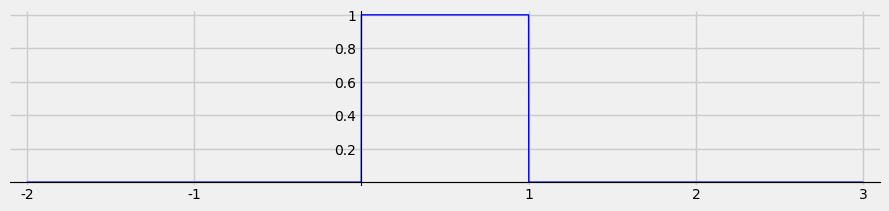

In [23]:
plot(ind(0,1),(t,-2,3), aspect_ratio=1)

On remarque néanmoins un problème dans le tracé, qu'on corrigera par la suite en réduisant très légèrement les intervalles lorsque l'on tracera les courbes.

On va maintenant calculer les fonctions splines de degré $d$ pour un vecteur nodal $v=(v_0,...,v_m)$ donné, en une variable t. On les définit comme suit :
\begin{cases}
N_{i,0}(t)=\mathbb{1}_{[v_i,v_{i+1}[}(t)\\
N_{i,d}(t)=\frac{t-v_i}{v_{i+d}-v_i} N_{i,d-1(t)} + \frac{v_{i+d+1}-t}{v_{i+d+1}-v_{i+1}} N_{i+1,d-1}(t)
\end{cases}
en prenant la convention $\frac{f(t)}{0} =0$

In [24]:
def spline(i,d,v):
    t=var('t')
    if d==0:
        return ind(v[i],v[i+1])
    elif v[i+d]-v[i]==0 and v[i+d+1]-v[i+1]==0 : return 0                             # On traite tous les cas
    elif v[i+d]-v[i]==0 : return ((v[i+d+1]-t)/(v[i+d+1]-v[i+1]))*spline(i+1,d-1,v)   # de division par 0 à part
    elif v[i+d+1]-v[i+1]==0 : return ((t-v[i])/(v[i+d]-v[i]))*spline(i,d-1,v)
    else :
        return ((t-v[i])/(v[i+d]-v[i]))*spline(i,d-1,v)+((v[i+d+1]-t)/(v[i+d+1]-v[i+1]))*spline(i+1,d-1,v)


In [25]:
def fspline(d,v):
    t=var('t')
    S=Family(spline(i,d,v) for i in range(len(v)-d-1))  #  Le nombre de fonctions à définir ici est donné par la proposition II.1
    return S

In [26]:
fspline(3,[0,0,0,0,1,2,3,3,3,3])

Family (1/2*(t - 1)^3*(sgn(t - 1) - sgn(t)), -1/2*(t - 1)^2*t*(sgn(t - 1) - sgn(t)) - 1/8*(2*(t - 1)*t*(sgn(t - 1) - sgn(t)) + ((t - 2)*(sgn(t - 1) - sgn(t - 2)) + t*(sgn(t - 1) - sgn(t)))*(t - 2))*(t - 2), 1/12*(((t - 1)*(sgn(t - 1) - sgn(t - 2)) - (t - 3)*(sgn(t - 2) - sgn(t - 3)))*(t - 3) + ((t - 2)*(sgn(t - 1) - sgn(t - 2)) + t*(sgn(t - 1) - sgn(t)))*t)*(t - 3) + 1/8*(2*(t - 1)*t*(sgn(t - 1) - sgn(t)) + ((t - 2)*(sgn(t - 1) - sgn(t - 2)) + t*(sgn(t - 1) - sgn(t)))*(t - 2))*t, 1/8*(2*(t - 2)*(t - 3)*(sgn(t - 2) - sgn(t - 3)) - ((t - 1)*(sgn(t - 1) - sgn(t - 2)) - (t - 3)*(sgn(t - 2) - sgn(t - 3)))*(t - 1))*(t - 3) - 1/12*(((t - 1)*(sgn(t - 1) - sgn(t - 2)) - (t - 3)*(sgn(t - 2) - sgn(t - 3)))*(t - 3) + ((t - 2)*(sgn(t - 1) - sgn(t - 2)) + t*(sgn(t - 1) - sgn(t)))*t)*t, -1/2*(t - 2)^2*(t - 3)*(sgn(t - 2) - sgn(t - 3)) - 1/8*(2*(t - 2)*(t - 3)*(sgn(t - 2) - sgn(t - 3)) - ((t - 1)*(sgn(t - 1) - sgn(t - 2)) - (t - 3)*(sgn(t - 2) - sgn(t - 3)))*(t - 1))*(t - 1), 1/2*(t - 2)^3*(sgn(t - 2)

Nous allons alors créer une fonction qui permettra d'afficher toutes les fonctions splines superposées.

In [27]:
def affichespline(d,v):
    p=plot(())
    for i in range(len(v)-d-1) :
        p+=plot(spline(i,d,v),(t,v[0]+10**-10,v[-1]-10**-10), color='red')
    p.show()

## Courbes B-splines <a name="courbesB"></a>

Nous allons maintenant créer une fonction permettant de créer la courbe Spline contrôlée par $n+1$ points rentrés dans une liste et un vecteur nodal $v=(v_0,...,v_m)$ donné.
Ce tracé s'effectue à partir de la définition utilisant des équations paramétriques.
La courbe B-spline de degré $d$ contrôlée par $n+1$ points, définie à partir d'une famille $(N_{i,d}(t))$ est la courbe paramétrée par :
$$ P(t)=\displaystyle \sum_{i=0} ^{n} N_{i,d}(t)P_i $$

In [28]:
def courbespline(v,L):
    t=var('t')
    d=len(v)-len(L)-1
    S=fspline(d,v) # On calcule les fonctions splines
    x(t)=sum([S[i]*L[i][0] for i in range(len(v)-d-1)]) # On crée x(t) avec sa définiion 
    y(t)=sum([S[i]*L[i][1] for i in range(len(v)-d-1)]) # De même pour y(t)
    p=parametric_plot([x(t),y(t)],(t,v[0]+10**-10,v[-1]-10**-10),rgbcolor='red') # On crée notre courbe paramétrée pour t 
    return p                                                                              # entre v0 et vm
    

In [29]:
def afficheCourbeSpline(v,L) :
    show(courbespline(v,L),aspect_ratio=1)

Nous reprenons maintenant quelques listes de points de contrôles utilisées précédemment avec les courbes de Bézier afin de tracer des courbes B-splines.

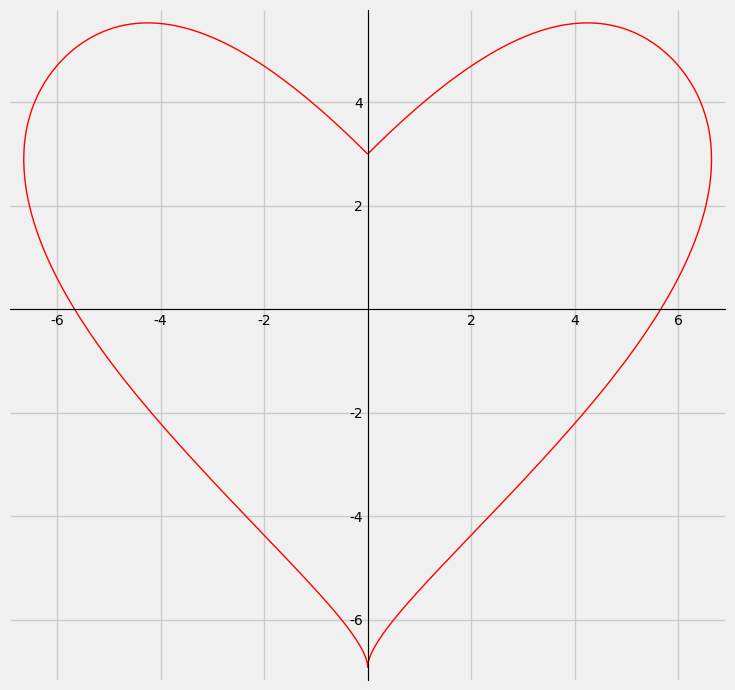

In [30]:
inf=[[0,0],[2,4],[3,1],[3,-5],[0,-5],[0,0],[0,5],[-3,5],[-3,-1],[-2,-4],[0,0]]
ruban=[[-2,2],[0,0],[2,-4],[0,-6],[-2,-4],[0,0],[2,2]]
coeur=[[0,3],[3,6],[6,6],[9,2],[0,-6],[0,-7],[0,-7],[0,-6],[-9,2],[-6,6],[-3,6],[0,3]]

afficheCourbeSpline([0,0,0,0,0,1,2,3,4,5,6,7,8,8,8,8,8],coeur)

Ici, nous avons choisi un vecteur nodal non uniforme avec une multiplicité de noeuds extrêmes $d+1$. Pour quelques points, il est déjà assez pénible de le déterminer et de le donner au programme. On va donc plutôt définir une fonction qui déterminera le vecteur nodal voulu pour une liste de $n+1$ points et un degré $d$.

In [31]:
def vecteurnodal(d,L):
    if len(L)<=d : raise ValueError("degré trop grand")
    v=[]
    v+=(d+1)*[0]                     #on ajoute (d+1) 0 au vecteur
    for i in range(1,len(L)-d):      #on ajoute ensuite (1,2,3,...,n-d-1)
        v+=[i]                       
    v+=(d+1)*[len(L)-d]              #on ajoute enfin (d+1) fois la valeur n-d
    return v

On peut alors tracer une courbe spline à partir d'une liste de points de contrôle et du degré souhaité.

In [32]:
def courbedegre(d,L):
    return courbespline(vecteurnodal(d,L),L)

In [33]:
def affichecourbedegre(d,L) : 
    show(courbedegre(d,L))

In [34]:
def concatenationBsplinedegre(d,L) :
    p=plot(())
    for j in range(len(L)) :
        p+=courbespline(vecteurnodal(d,L[j]),L[j])
    show(p,aspect_ratio=1,axes=False)

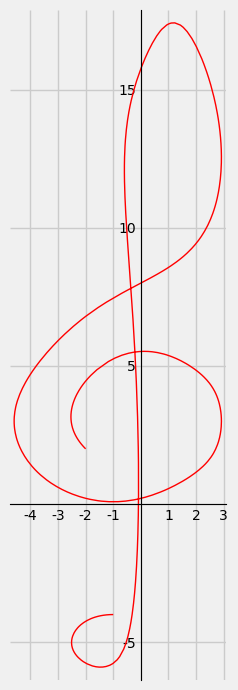

In [35]:
cle=[[-2,2],[-3,3],[-2,5],[0,6],[2,5],[3,4],[3,2],[2,1],[0,0],
     [-2,0],[-4,1],[-5,3],[-4,5],[-2,7],[0,8],[2,9],[3,11],
     [3,14],[2,17],[1,18],[0,16],[-1,13],[0,6],
     [0,-5],[-1,-6],[-2,-6],[-3,-5],[-2,-4],[-1,-4]]

affichecourbedegre(4,cle)

Voici quelques nouvelles listes de points de contrôle, afin de réaliser des tracés sans concaténation.

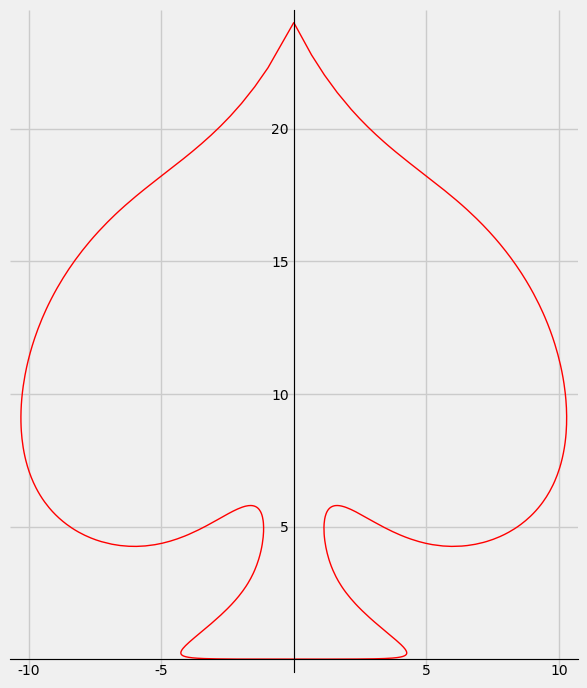

In [36]:
pique=[[0,24],[2,20],[6,18],[10,14],[11,7],[8,4],[4,4],[1,7],[1,4],[2,2],[5,0],[4,0],[-4,0],[-5,0],[-2,2],[-1,4],
       [-1,7],[-4,4],[-8,4],[-11,7],[-10,14],[-6,18],[-2,20],[0,24]]

cheval=[[7,21],[5,19],[4,17],[2,17],[1,19],[2,21],[1,24],[1,26],[0,28],[2,27],[3,27],[3,29],[4,27],[7,27],[10,26],[13,23],
        [16,21],[21,21],[24,20],[28,22],[30,21],[31,19],[32,18],[31,18],[32,14],[31,15],[32,11],[31,9],[30,11],[30,13],[29,12],
        [29,15],[28,15],[29,18],[28,20],[25,19],[26,17],[25,14],[27,10],[26,6],[26,4],[25,2],[23,1],[24,7],[24,11],[20,12],
        [23,9],[21,5],[21,2],[18,2],[20,6],[21,9],[19,10],[16,11],[14,11],[14,2],[15,0],[12,0],[12,8],[11,11],[7,10],[9,7],
        [9,5],[11,5],[10,2],[8,4],[7,7],[4,10],[9,15],[8,19],[7,21]]
Guitare=[[10.5,2],[9,3],[13,6],[12.5,6.5],[7,2],[3,9],[1,1],[1,-4],
         [7,1],[9,-1],[11,-2],[10,-1],[9,-0.5],[9.5,0.4],[10,0.5],[12,0.5],[14,0.5],[16,0.5],[20,0.5],
      [20.25,0.5],[20.5,-0.5],[21.5,0.5],[23,-0.5],[21.5,1.25],[23,3],[21.5,2],[20.5,3],[20.25,2],[20,2],
      [16,2],[14,2],[12,2],[10.5,2]]

affichecourbedegre(4,pique)

Voici également un tracé à obtenir avec la fonction <tt> concatenationBsplinedegre() </tt> , permettant d'obtenir un exemple de ce qu'il possible de faire avec des B-splines, avec un degré 4 notamment. L'avantage de la concaténation est qu'elle permet de diminuer fortement le temps de calcul. En revanche, lorsque l'on concatène des courbes B-splines, on obtient des courbes seulement $\mathcal{C} ^0 $, ce qui peut parfois poser problème.

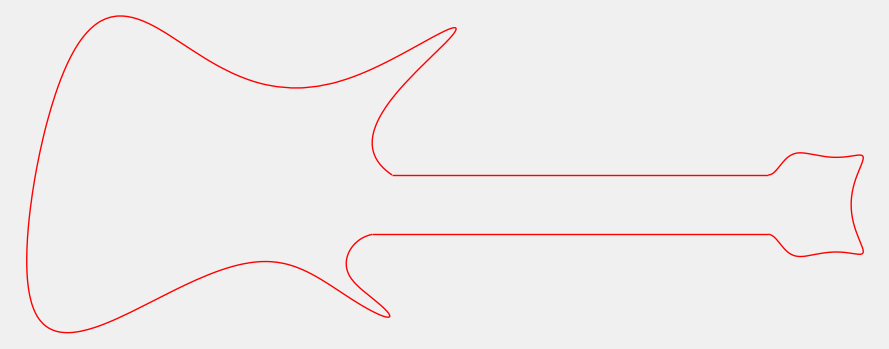

In [37]:
guitare=[[10.5,2],[9,3],[13,6],[12.5,6.5],[7,2],[3,9],[1,1],[1,-4],
         [7,1],[9,-1],[11,-2],[10,-1],[9,-0.5],[9.5,0.4],[10,0.5]]
manchebas=[[10,0.5],[12,0.5],[14,0.5],[16,0.5],[20,0.5]]
manchehaut=[[10.5,2],[12,2],[14,2],[16,2],[20,2]]
teteg=[[20,2],[20.25,2],[20.5,3],[21.5,2],[23,3],[21.5,1.25],[23,-0.5],
       [21.5,0.5],[20.5,-0.5],[20.25,0.5],[20,0.5]]
shecter=[guitare,manchebas,manchehaut,teteg]

concatenationBsplinedegre(4,shecter)

# Bonus partie programmation : les surfaces de Bézier <a name="bonus"></a>

En complément, nous avons souhaité, pour notre culture, voir comment il était possible d'implémenter les surfaces de Bézier en programmation. Il nous a donc été nécessaire de réaliser quelques recherches supplémentaires. Notamment, la construction et la définition des carreaux de Bézier. 

Nous avons souhaité implémenter les surfaces de Bézier d'une manière similaire à la première implémentation réalisée pour les courbes de Bézier. En effet, pour les surfaces de Bézier, on a la définition suivante : 

Soient $n,p \in \mathbb{N} $ et soient $A_{i,j} , 0 \leqslant i \leqslant n $ et $ 0 \leqslant j \leqslant p $ , $(n+1)(p+1)$ points de l'espace. Alors, la carreau de Bézier associée à ces points s'écrit : 

$$ \displaystyle\sum_{i=0} ^n \displaystyle\sum _{j=0}^p A_{i,j} B_{i,n}(u) B_{j,p}(v) \ \ \ \ u,v \in [0,1] $$
On pose :  $A_{i,j}= (x_{i,j} , y_{i,j} , z_{i,j} )$.

On a alors : 
\begin{cases} 
 x(u,v) = \displaystyle\sum_{i=0} ^n \displaystyle\sum _{j=0}^p x_{i,j} B_{i,n}(u) B_{j,p}(v) \\
 y(u,v) = \displaystyle\sum_{i=0} ^n \displaystyle\sum _{j=0}^p y_{i,j} B_{i,n}(u) B_{j,p}(v) \ \ \ \ u,v \in [0,1] \\
 z(u,v) = \displaystyle\sum_{i=0} ^n \displaystyle\sum _{j=0}^p z_{i,j} B_{i,n}(u) B_{j,p}(v) \\ 
\end{cases}

In [38]:
def surface(L) :
    u,v=var('u,v')
    n,p=len(L[0])-1, len(L)-1 
    Bn,Bp=Bernstein(n) ,Bernstein(p)
    x(u,v)=0
    y(u,v)=0
    z(u,v)=0
    for i in range(n+1) :
        for j in range(p+1) : 
            x(u,v)=x(u,v)+Bn[i](t=u)*Bp[j](t=v)*L[j][i][0]  # On crée x(t) avec sa définiion 
            y(u,v)=y(u,v)+Bn[i](t=u)*Bp[j](t=v)*L[j][i][1]  # De même pour y(t)
            z(u,v)=z(u,v)+Bn[i](t=u)*Bp[j](t=v)*L[j][i][2]  # De même pour z(t)
    p=parametric_plot3d([x(u,v), y(u,v), z(u,v)], (u, 0, 1), (v, 0, 1), frame=True, color="purple")
    show(p)

Nous avons ensuite essayé d'implémenter une fonction renvoyant une surface aléatoire avec seulement $n$ et $p$ indiqués à l'entrée. 

In [39]:
def surfaceAleatoire(n,p):
    m=[]
    for i in range(n+1) : 
        m.append([])
        for j in range(p+1) : 
            m[i].append([randint(-50,50),randint(-50,50),randint(-10,10)])

    print(m)
    surface(m)

Nous avons ensuite ajouté quelques exemples de listes de points de contrôle. De plus, à l'aide d'une génération aléatoire de listes, nous avons trouvé de nouveaux exemples que nous avons choisi de garder.  En effet, certaines listes générées aléatoirement illustraient, selon nous, de manière assez explicite les multiples possibilités offertes par les surfaces de Bézier.

In [40]:
surface1=[[[0,0,0],[1,0,0]],
       [[1,1,1],[0,0,1]]]
surface2=[[[0,0,0],[1,0,0]],
      [[1,1,1],[1,0,1]]]
surface3=[[[0,0,0],[1,0,0]],
          [[1,1,1],[0,0,1]],
          [[0,0,2],[1,0,2]],
          [[1,1,2],[0,0,2]]]
surface4= [[[-1.5, -1.5, 4.0], [-0.5, -1.5, 2.0],[0.5, -1.5, -1.0], [1.5, -1.5, 2.0]],
        [[-1.5, -0.5, 1.0], [-0.5, -0.5, 3.0],[0.5, -0.5, 0.0], [1.5, -0.5, -1.0]],
        [[-1.5, 0.5, 4.0], [-0.5, 0.5, 0.0],[0.5, 0.5, 3.0], [1.5, 0.5, 4.0]],
        [[-1.5, 1.5, -2.0], [-0.5, 1.5, -2.0],[0.5, 1.5, 0.0], [1.5, 1.5, -1.0]]]
surface5=[[[0,0,0],[1,0,0],[2,0,0],[3,0,0]],
        [[0,1,0],[1,1,6],[2,1,6],[3,1,0]],
        [[0,2,0],[1,2,6],[2,2,6],[3,2,0]],
        [[0,3,0],[1,3,0],[2,3,0],[3,3,0]]]
surface6=[[[0,0,0],[1,0,1],[2.3,1,3],[3,0,1]],
       [[0,1,4],[1.4,2,5],[-2.3,1,3],[3,1,1]],
       [[2,1,4],[1,2,5],[-2.3,1,3],[3,1,1]],
       [[2,1,4],[1,2,5],[-2.3,1,3],[3,1,1]]]
surface7=[[[-1.5, -5, 4.0], [0.5, 8, 5.0],[5, 5, -3.0], [1, 1.5, 3.0]],
       [[1.5, -0.5, 1.0], [-0.5, 2.5, 1.0],[0.5, -5, 0.0], [1.5, -4.5, -1.0]],
       [[-0.5, 4.5, 1.0], [-0.5, 0.5, 0.0],[0.5, -0.5, 3.0], [-1.5, 2.5, 4.0]],
       [[-1.5, -1.5, 2.0], [0.5, -1.5, -2.0],[0.5, 5, 0.0], [1.5, 1.5, -1.0]]]
surfacealeatoire1=[[[-18, 31, 4], [-19, -35, -8], [-33, -8, 9], [25, -5, 9], [23, -25, 6], [40, -33, -5]], 
                [[-26, 7, -4], [42, 33, -10], [-31, 20, -9], [25, -50, -4], [8, 22, 8], [25, -1, -10]], 
                [[21, -47, -7], [-20, 45, -5], [-7, -19, -2], [-14, -27, 1], [-38, 43, 1], [-50, 20, -3]], 
                [[-31, -16, 2], [-8, -3, 6], [-29, 40, -2], [-23, -3, 5], [5, 30, -7], [-15, 40, 9]], 
                [[45, 29, -10], [-37, 37, -8], [-12, -48, -8], [-27, -32, -9], [17, 30, -1], [39, 16, -7]], 
                [[-24, 20, 9], [43, 30, 6], [0, 5, 10], [-42, 33, -6], [4, 13, -10], [49, 12, -5]]]
surfacealeatoire2=[[[-7, -13, -10], [36, -39, -10], [-45, 15, 4], [-13, 21, 2]], 
            [[26, -26, -7], [36, 43, -4], [45, 30, -6], [-37, 9, -10]],
            [[-16, -38, 8], [-25, -23, -4], [-38, -29, -8], [15, -28, -9]], 
            [[10, 3, 6], [-31, 28, 3], [-25, -50, -3], [-18, 10, -1]]]
surfacealeatoire3=[[[-46, -7, 1], [23, 12, -8], [48, -25, 1], [-1, -17, 8]], 
                   [[26, 41, 2], [-10, 2, -5], [32, 28, 3], [-30, 35, -9]],
                   [[-18, -32, -3], [0, -46, 9], [-1, 28, 4], [32, -2, 1]],
                   [[-7, -19, -3], [3, -36, 3], [-43, 36, -6], [31, -47, -6]]]
surfacealeatoire4=[[[8, 6, 7], [14, -33, -8], [37, -50, 8]], 
                   [[-46, -44, -2], [39, 39, 3], [47, 41, 7]],
                   [[23, -40, 4], [-12, -32, -10], [-29, -18, -8]]]
surfacealeatoire5=[[[29, 17, -10], [26, -13, 0], [41, -19, -2]],
                   [[24, 8, 8], [23, -19, -3], [-33, 2, -7]], 
                   [[46, 37, -10], [4, 9, 3], [19, -7, 5]]]

In [41]:
surfaceAleatoire(3,3)

[[[-35, 48, 1], [11, -16, -1], [-39, 26, -7], [3, -9, 1]], [[22, -43, 10], [-23, -4, -4], [-42, -9, 3], [6, 25, 9]], [[28, -16, 6], [-7, -15, -6], [17, 23, -4], [42, -12, 8]], [[-5, 3, -8], [0, 3, 4], [-34, -28, -10], [38, 0, 3]]]


Graphics3d Object